## Decision Tree Regressor

El **DecisionTreeRegressor** es un modelo de aprendizaje supervisado utilizado para problemas de regresión, donde la variable objetivo es continua.
Su funcionamiento se basa en dividir los datos en ramas mediante reglas de decisión que minimizan el error cuadrático medio (MSE) en cada partición.

Cada nodo representa una condición sobre una variable, y las hojas finales contienen los valores promedio de la variable objetivo para los datos que cumplen esas condiciones.

Este modelo es fácil de interpretar, puede manejar relaciones no lineales entre variables y no requiere una gran cantidad de preprocesamiento. Sin embargo, puede sobreajustarse si no se limita su profundidad o el número mínimo de muestras por división.

### Funcionamiento

Su funcionamiento se basa en:
- Dividir los datos en ramas mediante reglas de decisión
- Minimizar el error cuadrático medio (MSE) en cada partición
- Cada nodo representa una condición sobre una variable
- Las hojas finales contienen los valores promedio de la variable objetivo

### Características

Este modelo es fácil de interpretar, puede manejar relaciones no lineales entre variables y no requiere una gran cantidad de preprocesamiento. Sin embargo, puede sobreajustarse si no se limita su profundidad o el número mínimo de muestras por división.

### Ventajas

- **Intuitivo y visualmente interpretable**: Fácil de entender y explicar
- **Capaz de modelar relaciones complejas**: Maneja interacciones no lineales
- **No requiere normalización de datos**: Funciona directamente con los datos originales

### Desventajas

- **Sensible al sobreajuste**: Puede memorizar los datos de entrenamiento
- **Inestabilidad**: Pequeños cambios en los datos pueden alterar la estructura del árbol


In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


### 1. Carga y preparación de datos

In [3]:

# Cargar el dataset de aguacate
ruta = '../../data/processed/avocado_cleaned_normalized.csv'  
df = pd.read_csv(ruta)

# Ver las primeras filas para entender la estructura
print("Muestra del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())

# Definir variables predictoras (X) y objetivo (y)
X = df.drop(columns=['Unnamed: 0', 'AveragePrice'])  # Eliminar índice y variable objetivo
y = df['AveragePrice']  # Precio promedio como variable objetivo
feature_names = X.columns

# Dividir datos en entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nDimensiones de los datos de entrenamiento: {X_train.shape}")
print(f"Dimensiones de los datos de prueba: {X_test.shape}")

Muestra del dataset:
   Unnamed: 0  AveragePrice  Total Volume      4046      4225      4770  \
0    0.000000      0.344633      0.327394  0.007284  0.389698  0.042863   
1    0.019231      0.355932      0.279628  0.004737  0.319451  0.051914   
2    0.038462      0.118644      0.602895  0.005583  0.781114  0.116147   
3    0.057692      0.203390      0.402698  0.007953  0.515089  0.064597   
4    0.076923      0.316384      0.260045  0.006615  0.313723  0.067445   

   Total Bags  Small Bags  Large Bags  XLarge Bags  ...  region_Seattle  \
0    0.313010    0.356248    0.017721          0.0  ...           False   
1    0.342115    0.389557    0.018526          0.0  ...           False   
2    0.293160    0.333001    0.019600          0.0  ...           False   
3    0.209150    0.235082    0.025419          0.0  ...           False   
4    0.222567    0.247871    0.037568          0.0  ...           False   

   region_SouthCarolina  region_SouthCentral  region_Southeast  \
0          

### 2. Entrenamiento del modelo DecisionTreeRegressor

In [30]:
# Crear y entrenar el modelo
dt_reg = DecisionTreeRegressor(max_depth=None, random_state=42)
dt_reg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [31]:
# Realizar predicciones
y_pred_dt = dt_reg.predict(X_test)

# Evaluar el modelo
MSE_DT = mean_squared_error(y_test, y_pred_dt)
R2_DT = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MSE: {MSE_DT:.3f}")
print(f"Decision Tree R2: {R2_DT:.3f}")

Decision Tree MSE: 0.012
Decision Tree R2: 0.574


#### 2.1 Experimentando con random_state

Random state 10: MSE=0.011875, R2=0.595020
Random state 15: MSE=0.012374, R2=0.577998
Random state 20: MSE=0.012509, R2=0.573400
Random state 25: MSE=0.011897, R2=0.594246
Random state 30: MSE=0.012292, R2=0.580800
Random state 35: MSE=0.012199, R2=0.583951
Random state 40: MSE=0.011651, R2=0.602660
Random state 45: MSE=0.012619, R2=0.569651
Random state 50: MSE=0.012560, R2=0.571640
Random state 55: MSE=0.012599, R2=0.570327
Random state 60: MSE=0.012139, R2=0.586018
Random state 65: MSE=0.012208, R2=0.583660
Random state 70: MSE=0.012815, R2=0.562949
Random state 75: MSE=0.012299, R2=0.580548
Random state 80: MSE=0.012284, R2=0.581072
Random state 85: MSE=0.012148, R2=0.585692
Random state 90: MSE=0.012649, R2=0.568620
Random state 95: MSE=0.012518, R2=0.573075

Top 5 mejores random_states:
1. Random state 40: MSE=0.011651, R2=0.602660
2. Random state 10: MSE=0.011875, R2=0.595020
3. Random state 25: MSE=0.011897, R2=0.594246
4. Random state 60: MSE=0.012139, R2=0.586018
5. Random st

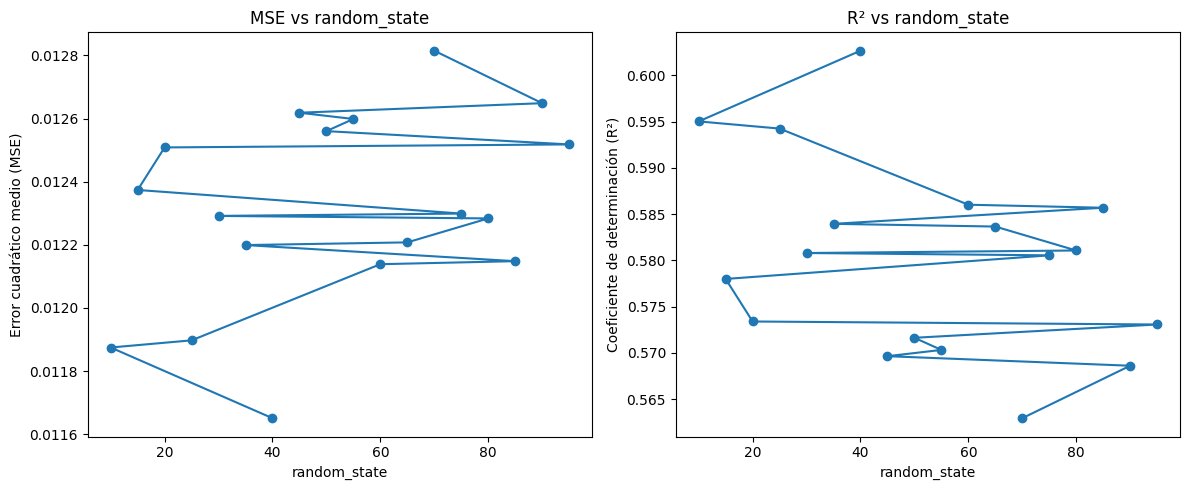

In [32]:
# Búsqueda del mejor random_state
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Parámetros fijos
max_depth = None  # El que ya usas
random_states = list(range(10, 100, 5))  # Probar varios valores

# Almacenar resultados
results = []

# Evaluar cada random_state
for rs in random_states:
    # Crear y entrenar modelo
    dt_model = DecisionTreeRegressor(max_depth=max_depth, random_state=rs)
    dt_model.fit(X_train, y_train)
    
    # Evaluar en test
    y_pred = dt_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar resultados
    results.append((rs, mse, r2))
    print(f"Random state {rs}: MSE={mse:.6f}, R2={r2:.6f}")

# Ordenar por MSE (menor a mayor)
results.sort(key=lambda x: x[1])

# Mostrar los 5 mejores random_states
print("\nTop 5 mejores random_states:")
for i, (rs, mse, r2) in enumerate(results[:5]):
    print(f"{i+1}. Random state {rs}: MSE={mse:.6f}, R2={r2:.6f}")

# Visualizar
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot([r[0] for r in results], [r[1] for r in results], 'o-')
plt.title('MSE vs random_state')
plt.ylabel('Error cuadrático medio (MSE)')
plt.xlabel('random_state')

plt.subplot(1, 2, 2)
plt.plot([r[0] for r in results], [r[2] for r in results], 'o-')
plt.title('R² vs random_state')
plt.ylabel('Coeficiente de determinación (R²)')
plt.xlabel('random_state')

plt.tight_layout()
plt.show()

#### 2.2 GridSearchCV para optimización

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [9, 13, 18], #5, 7, 9 | 15, 18, 21 | Mejor: 9, 13, 18
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [40]  # Fijo para reproducibilidad
}

grid_search = GridSearchCV(
    DecisionTreeRegressor(), 
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor MSE: {-grid_search.best_score_:.4f}")

# Usar el mejor modelo
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
print(f"MSE con mejores parámetros: {mean_squared_error(y_test, y_pred_best):.4f}")

Mejores parámetros: {'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 40}
Mejor MSE: 0.0149
MSE con mejores parámetros: 0.0114


### 2.3. Optimización del hiperparámetro max_depth

max_depth=3: MSE=0.024, R2=0.174
max_depth=5: MSE=0.021, R2=0.284
max_depth=7: MSE=0.017, R2=0.423
max_depth=10: MSE=0.014, R2=0.510
max_depth=15: MSE=0.012, R2=0.575
max_depth=None: MSE=0.012, R2=0.574


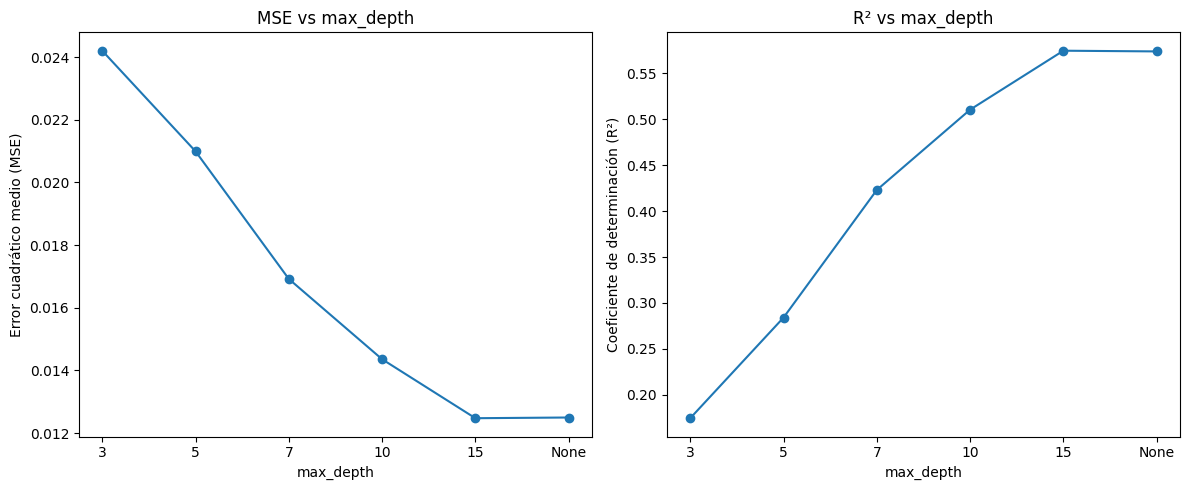

In [34]:
# Probar diferentes valores de max_depth
max_depths = [3, 5, 7, 10, 15, None]
mse_scores = []
r2_scores = []

for depth in max_depths:
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))
    
    print(f"max_depth={depth}: MSE={mse_scores[-1]:.3f}, R2={r2_scores[-1]:.3f}")

# Visualizar resultados
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot([str(d) if d is not None else 'None' for d in max_depths], mse_scores, 'o-')
plt.title('MSE vs max_depth')
plt.ylabel('Error cuadrático medio (MSE)')
plt.xlabel('max_depth')

plt.subplot(1, 2, 2)
plt.plot([str(d) if d is not None else 'None' for d in max_depths], r2_scores, 'o-')
plt.title('R² vs max_depth')
plt.ylabel('Coeficiente de determinación (R²)')
plt.xlabel('max_depth')

plt.tight_layout()
plt.show()

### 3. Visualización del árbol de decisión

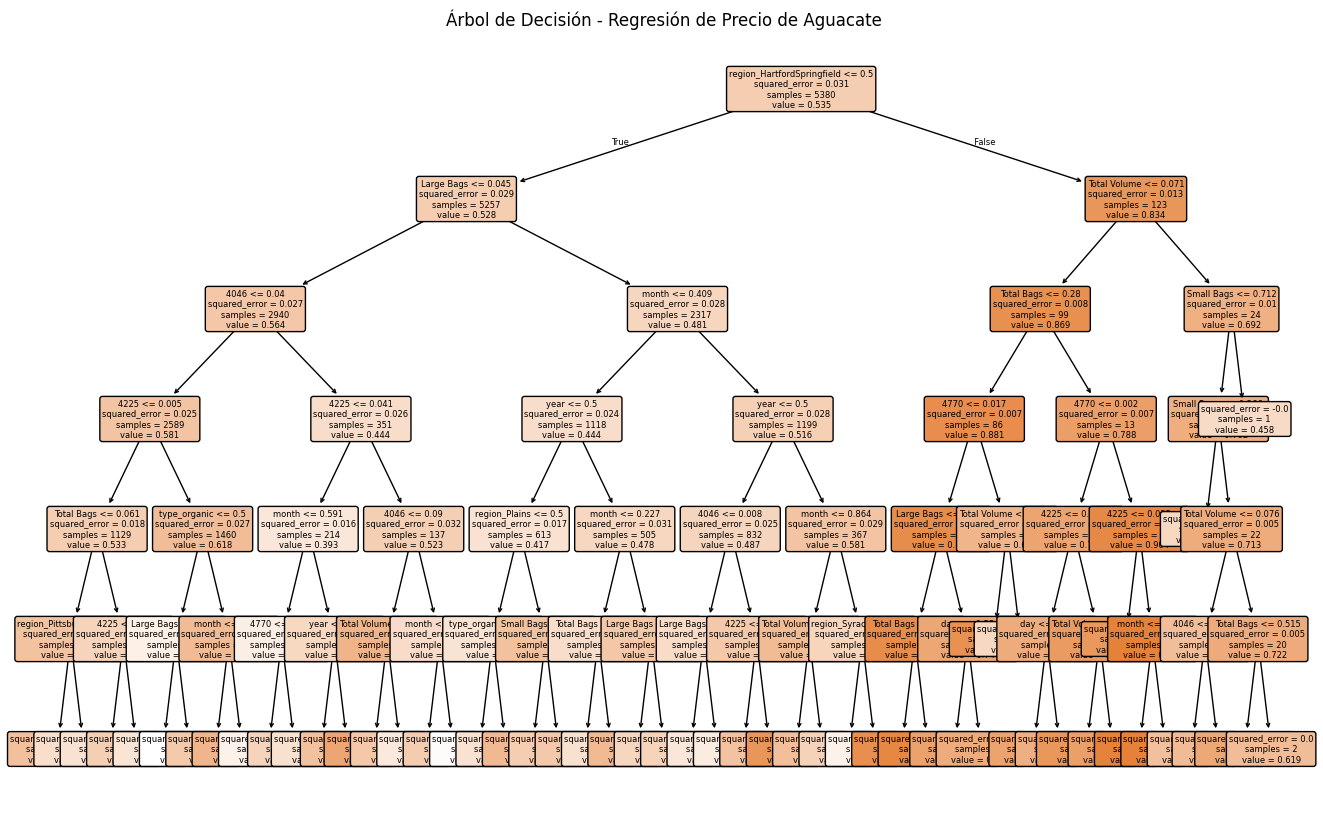

In [9]:
# Visualización del árbol entrenado (limitando a un tamaño manejable)
plt.figure(figsize=(16, 10))
plot_tree(
    dt_reg,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=6,
    max_depth=8  # Limite de la profundidad para visualización
)
plt.title("Árbol de Decisión - Regresión de Precio de Aguacate")
plt.show()

### 5. Visualización de predicciones vs valores reales

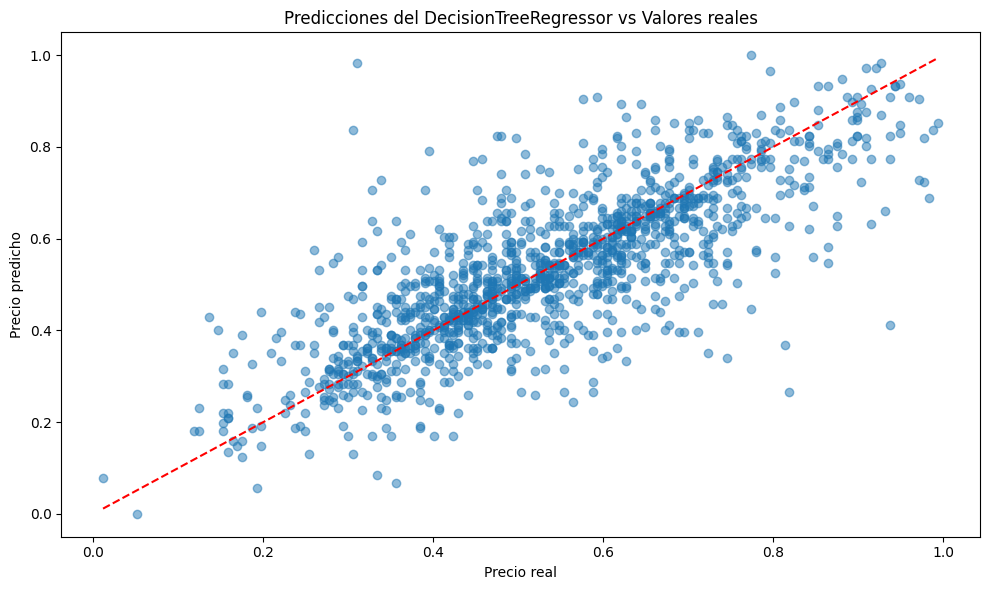

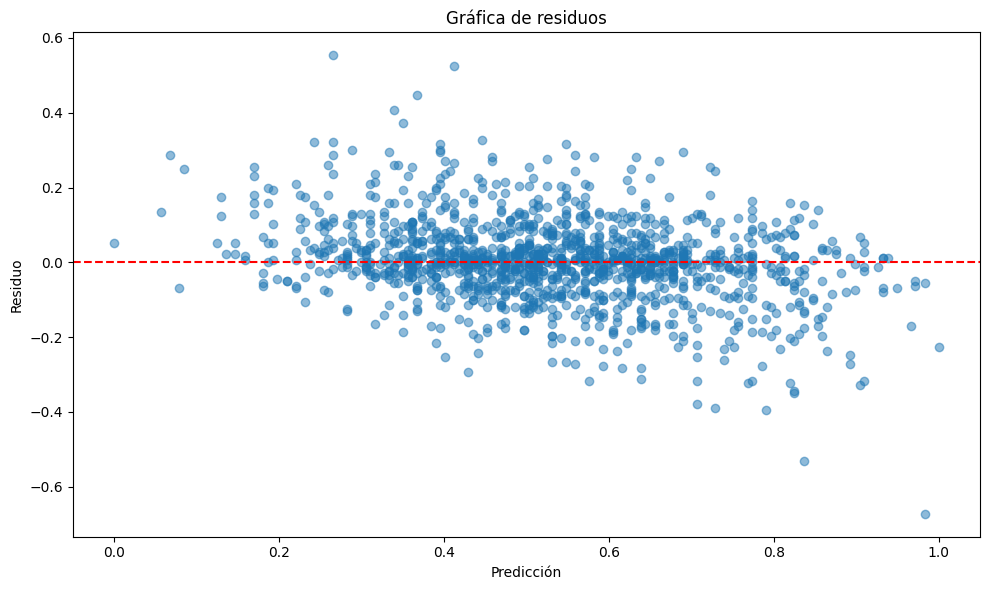

In [35]:
# Comparar predicciones con valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Predicciones del DecisionTreeRegressor vs Valores reales')
plt.tight_layout()
plt.show()

# Gráfica de residuos
residuals = y_test - y_pred_dt
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_dt, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicción')
plt.ylabel('Residuo')
plt.title('Gráfica de residuos')
plt.tight_layout()
plt.show()